We are evaluating the Titanic data set for any interesting trends or findings regarding the survival rate of the passengers. First, we must remove unnecessary data from the dataset and move forward with the evaluation. 

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('/content/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:

df.drop(columns = 'Embarked', axis = 1, inplace = True)
df.drop(columns = 'Ticket', axis = 1, inplace = True)
df.drop(columns = 'PassengerId', axis = 1, inplace = True)
df.drop(columns = 'Name', axis = 1, inplace = True)
df.drop(columns = 'Cabin', axis = 1, inplace = True)
df.drop(columns = 'Age', axis = 1, inplace = True)
df

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000
887,1,1,female,0,0,30.0000
888,0,3,female,1,2,23.4500
889,1,1,male,0,0,30.0000


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df_clean = df.copy()
label_encoder = LabelEncoder()
df_clean['Sex'] = label_encoder.fit_transform(df['Sex'])


df_clean

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,1,1,0,7.2500
1,1,1,0,1,0,71.2833
2,1,3,0,0,0,7.9250
3,1,1,0,1,0,53.1000
4,0,3,1,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000
887,1,1,0,0,0,30.0000
888,0,3,0,1,2,23.4500
889,1,1,1,0,0,30.0000


In [11]:
cols = df.columns.to_list()
cols.remove('Survived')
cols

features = df_clean[cols]
response = df_clean['Survived']

In [12]:

from sklearn.model_selection import train_test_split
features_train, features_test, response_train, response_test = train_test_split(features, response, test_size = .3, random_state = 0)


from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(features_train, response_train)

DecisionTreeClassifier(random_state=0)

In [13]:
predictions = classifier.predict(features_test)
titanic_pred = pd.DataFrame({'Actual': response_test, 'Predictions': predictions})
titanic_pred.head()

,Actual,Predictions
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1


In [15]:
from sklearn.metrics import accuracy_score
print('Accuracy score is ', accuracy_score(response_test, predictions))

Accuracy score is  0.8171641791044776


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(response_test, predictions)

array([[147,  21],
       [ 28,  72]])

In [20]:

idx = ['actual 0', 'actual 1']
cm = pd.DataFrame(confusion_matrix(response_test, predictions),
                  columns = ['pred 0', 'pred 1'],
                  index = idx)
cm

,pred 0,pred 1
actual 0,147,21
actual 1,28,72


**Plotting Tree Structure**

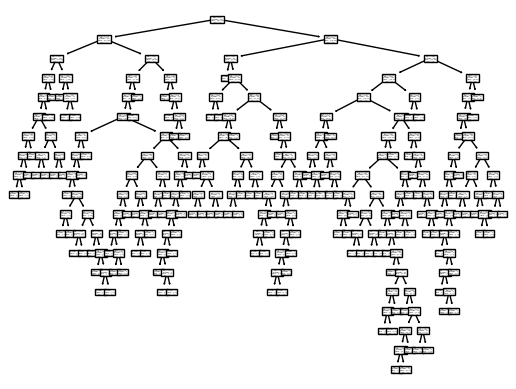

In [21]:
from sklearn.tree import plot_tree
decision_tree_plot = plot_tree(classifier, feature_names = cols, class_names= True)

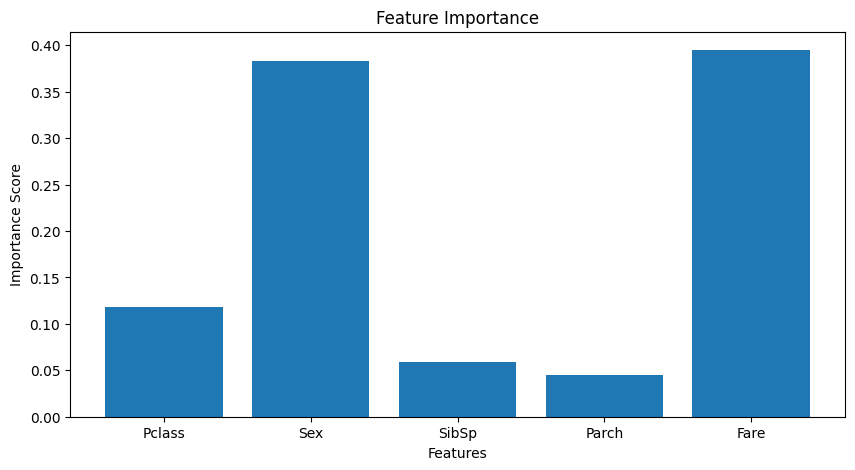

In [22]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,5))
plt.bar(x = cols, height = classifier.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

From the results using the Titanic data set, we were able to create a over 81% accuracy. This model as it is, is more than enough to evaluate and esitmate the information from the titanic, but another model with higher accuracy levels may be a better fit given the circumstance. 